# **Parkinson's Disease Detection**

Importing the required libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd

Loading the data

In [ ]:
#load the data
data = pd.read_csv("/content/drive/My Drive/parkinsons.data")
data

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.555477  0.148569

[195 rows x 24 columns]

In [ ]:
data.describe

<bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#converting the data into dataframe using pandas
df = pd.DataFrame(data)
df.head()


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

# **Getting the features and labels of the dataset**

In [ ]:
x1 = df.drop(['status'],axis=1)
y1 = df[["status"]]

In [ ]:
x1

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.555477  0.148569

[195 rows x 23 columns]

In [ ]:
y1

status
0         1
1         1
2         1
3         1
4         1
..      ...
190       0
191       0
192       0
193       0
194       0

[195 rows x 1 columns]

In [ ]:
x = df.drop(['status'],axis=1).values[:,1:]
y = df[["status"]].values

In [ ]:
x

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.3014419999999998,
        0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259,
        0.33263400000000004],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.6797720000000003,
        0.13172799999999998],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [ ]:
x[0]

array([119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554,
       0.011090000000000001, 0.04374, 0.426, 0.02182, 0.0313,
       0.029710000000000004, 0.06545, 0.022109999999999998, 21.033,
       0.414783, 0.815285, -4.813031, 0.266482, 2.3014419999999998,
       0.284654], dtype=object)

In [ ]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
y1['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# **Visualization of data**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


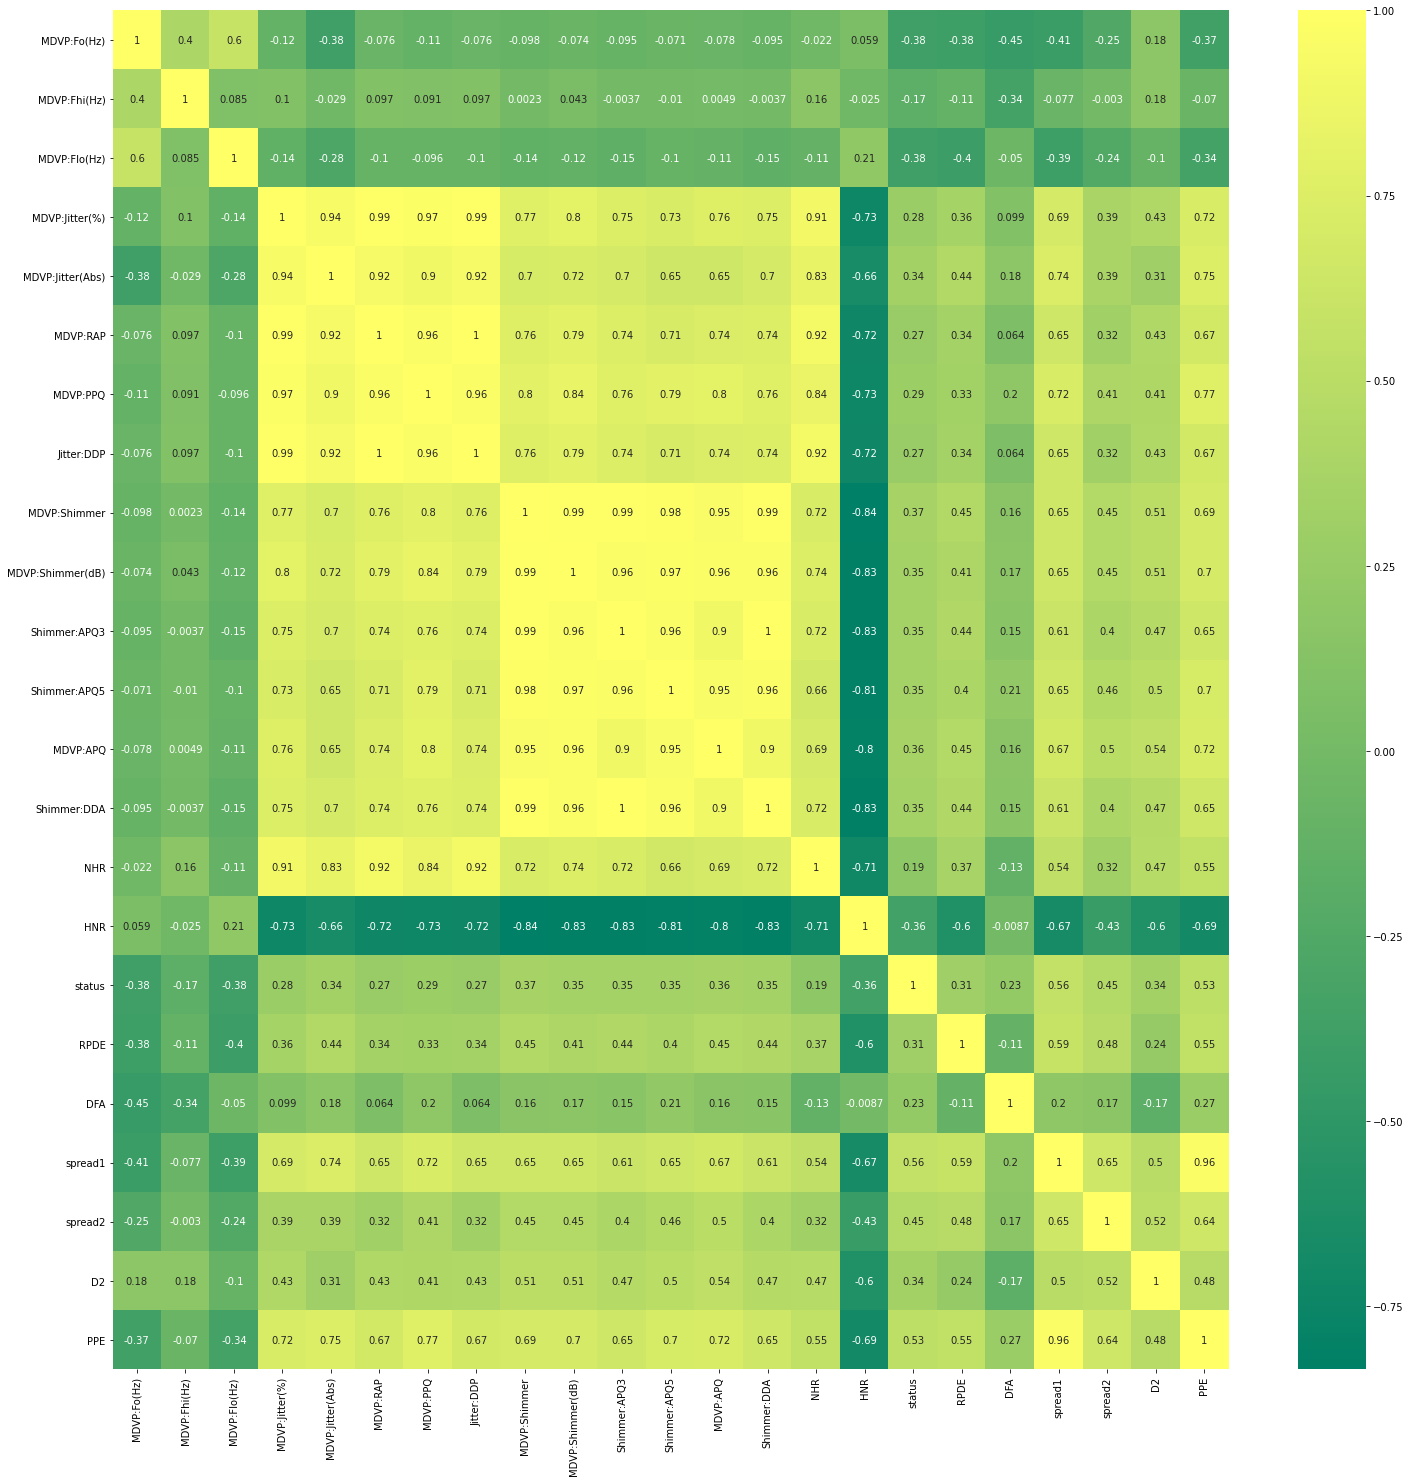

In [ ]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
relation = data.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(relation, annot=True, cmap='summer') 
plt.show()

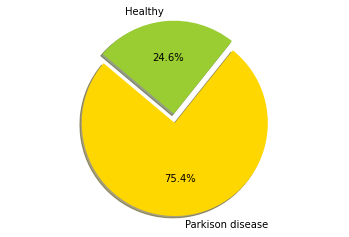

In [ ]:
#pie chart
labels = 'Parkison disease', 'Healthy'
sizes = [147, 48]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


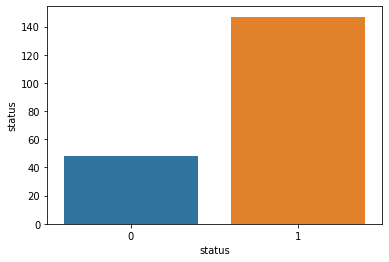

In [ ]:
#bar chart
import seaborn as sns
sns.countplot(df['status'].values)
plt.xlabel('status')
plt.ylabel('status')
plt.show()

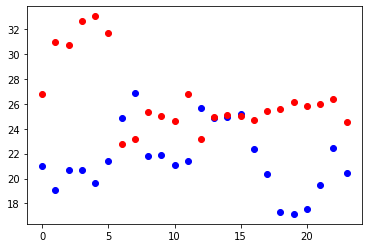

In [ ]:
#scatter chart
index_class=[]
for i in range(24):
    index_class.append(i)
plt.scatter(x=index_class,y=df[df['status']==1].HNR[:24],color='b')
plt.scatter(x=index_class,y=df[df['status']==0].HNR[:24],color='r')
plt.show()


# **Scaling the features (x) between 0 to 1**

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler((0,1))
x2 = scale.fit_transform(x)
y2 = y

In [ ]:
df.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## **Splitting the training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

# **Training the data using XGBoost Classifier**




In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
x_test

array([[209.516, 253.017, 89.488, 0.00564, 2.9999999999999997e-05,
        0.00331, 0.00292, 0.009940000000000001, 0.027510000000000003,
        0.263, 0.016040000000000002, 0.016569999999999998, 0.01879,
        0.048119999999999996, 0.0181, 19.147, 0.431674, 0.683244,
        -6.195325, 0.129303, 2.784312, 0.16889500000000002],
       [128.94, 479.697, 88.251, 0.00581, 5e-05, 0.0024100000000000002,
        0.00314, 0.0072299999999999994, 0.02008, 0.221,
        0.008490000000000001, 0.011170000000000001, 0.01734,
        0.025480000000000003, 0.0235, 24.743, 0.487756, 0.68413,
        -6.186128, 0.279933, 2.68624, 0.152428],
       [163.656, 200.841, 76.779, 0.00742, 5e-05, 0.0038, 0.0039, 0.0114,
        0.01659, 0.164, 0.007379999999999999, 0.00948,
        0.014969999999999999, 0.02214, 0.01778, 23.831, 0.397937,
        0.732479, -5.557447, 0.22089, 2.692176, 0.21596100000000001],
       [170.756, 450.247, 79.032, 0.00555, 2.9999999999999997e-05,
        0.00244, 0.00261000000000

# **Predicting the accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9487179487179487


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

# **Result**

In [ ]:
model.predict([209.516, 253.017, 89.488, 0.00564, 2.9999999999999997e-05,
        0.00331, 0.00292, 0.009940000000000001, 0.027510000000000003,
        0.263, 0.016040000000000002, 0.016569999999999998, 0.01879,
        0.048119999999999996, 0.0181, 19.147, 0.431674, 0.683244,
        -6.195325, 0.129303, 2.784312, 0.16889500000000002])

array([1])

In [ ]:
model.predict([228.969, 239.541, 113.201, 0.00238, 1e-05, 0.0013599999999999999,
        0.0014, 0.004079999999999999, 0.01745, 0.154, 0.00942, 0.0116,
        0.01234, 0.02827, 0.0042, 24.547, 0.305429, 0.681811,
        -7.314236999999999, 0.006274, 2.1185959999999997, 0.091546])

array([0])

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb')) #write mode
model1=pickle.load(open('model.pkl','rb')) #read mode